In [14]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 20,5

В данной работе используется датасет с Kaggle.com, содержащий результаты футбольных матчей всех сборных Европы с конца 19 века. Он актуален на момент нынешнего Евро 2020, последний матч датиован 06.07.21.

### Подготовка данных

In [2]:
results = pd.read_csv('ALL_GOALS/archive/results.csv')

In [3]:
results.count()

date          42405
home_team     42402
away_team     42402
home_score    42397
away_score    42397
tournament    42405
city          42405
country       42405
neutral       42402
dtype: int64

In [4]:
results.isna().sum()

date          0
home_team     3
away_team     3
home_score    8
away_score    8
tournament    0
city          0
country       0
neutral       3
dtype: int64

- В наличии более 42 тысяч матчей, поэтому можно просто откинуть все NaN значения, коих мало

In [5]:
results.dropna(inplace=True)

- Чтобы было проще, сделаем отдельные столбецы с годом игры, а также с результатами

In [6]:
def year(data):
    return dt.strptime(data.date, '%Y-%m-%d').year

# def month(data):
#     return dt.strptime(data.date, '%Y-%m-%d').month

results['year'] = results.apply(year, axis=1)
# results['month'] = results.apply(month, axis=1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876


## Задача 1

Проверить результативность в матчах сборной России (они же СССР) за весь датасет. Отдельно посмотреть домашие и выездные матчи. 

- Рассмотрим лишь игры от 1930 года, чтобы не портило график, ибо с 1907 года по 1930 было проведено 10 игр

In [7]:
russia = results.loc[((results.home_team == 'Russia') | (results.away_team == 'Russia')) & (results.year > 1930), :]

- Добавим столбец с днем недели, в который был сыгран матч, а также столбец с результатами

In [8]:
# Пример работы библиотеки calendar

import calendar

mydate = "21-01-2019"

workdate = dt.strptime(mydate, "%d-%m-%Y")
print(calendar.day_abbr[workdate.date().weekday()])

Mon


In [9]:
# Добавим столбец с результатом матча

def result(data):
    if data.home_team == 'Russia':
        
        if data.home_score > data.away_score:
            return 'победа'
        elif data.home_score == data.away_score:
            return 'ничья'
        else:
            return 'поражение'
        
    else:
        
        if data.away_score > data.home_score:
            return 'победа'
        elif data.away_score == data.home_score:
            return 'ничья'
        else:
            return 'поражение'

# Библиотека calendar возвращает дни недели как Mon, Tue..., что по алфавиту сортировлось не в соответствии с
# порядком дней недели. Поэтому эти названия недели переименованы на русский язык с добавлением порядкового номера 
def weekday(data):
    
    date = dt.strptime(data.date, "%Y-%m-%d")
#     weekday = calendar.day_abbr[date.date().weekday()]
    weekday = calendar.day_abbr[date.date().weekday()]
    if weekday == 'Mon':
        return '1. Понедельник'
    
    elif weekday == 'Tue':
        return '2. Вторник'
    
    elif weekday == 'Wed':
        return '3. Среда'
    
    elif weekday == 'Thu':
        return '4. Четверг'
    
    elif weekday == 'Fri':
        return '5. Пятница'
    
    elif weekday == 'Sat':
        return '6. Суббота'
    
    elif weekday == 'Sun':
        return '7. Воскресенье'
    
russia['result'] = russia.apply(result, axis=1)
russia['weekday'] = russia.apply(weekday, axis=1)

/home/aas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
russia.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,weekday
3348,1952-05-24,Russia,Hungary,1.0,1.0,Friendly,Moscow,Soviet Union,False,1952,ничья,6. Суббота
3352,1952-05-27,Russia,Hungary,2.0,1.0,Friendly,Moscow,Soviet Union,False,1952,победа,2. Вторник
3700,1954-09-08,Russia,Sweden,7.0,0.0,Friendly,Moscow,Soviet Union,False,1954,победа,3. Среда
3709,1954-09-26,Russia,Hungary,1.0,1.0,Friendly,Moscow,Soviet Union,False,1954,ничья,7. Воскресенье
3803,1955-06-26,Sweden,Russia,0.0,6.0,Friendly,Solna,Sweden,False,1955,победа,7. Воскресенье


- Отдельно создадим прееменные для домашних и выездных матчей

In [12]:
home_games = russia.loc[russia.home_team == 'Russia', ['home_score', 'away_score', 'year', 'month', 'result', 'weekday']]
away_games = russia.loc[russia.away_team == 'Russia', ['home_score', 'away_score', 'year', 'month', 'result', 'weekday']]

- Сколько мячей забито и пропущено по годам на своем поле

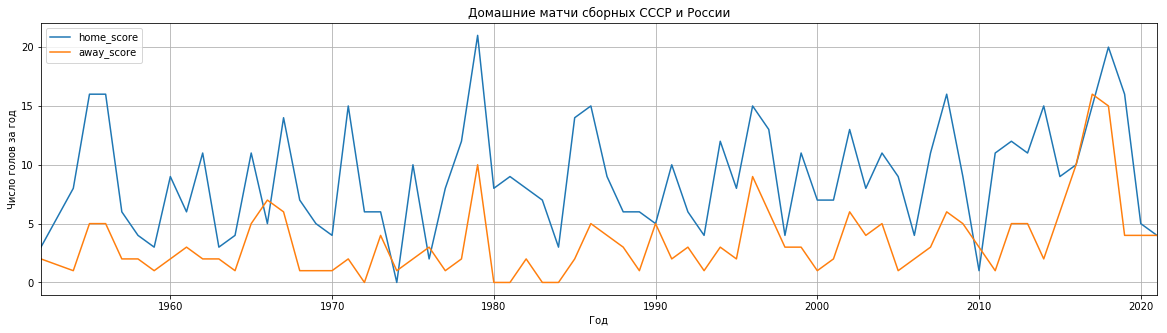

In [15]:
home_games.groupby(['year']).sum()[['home_score', 'away_score']].plot()
plt.title('Домашние матчи сборных СССР и России')
plt.xlabel('Год')
plt.ylabel('Число голов за год')
plt.grid()

На данном графике можно увидеть, что за один календарный год НА СВОЕМ ПОЛЕ сборная стабильно забивает больше голов, чем пропускает. Наблюдаются всплески по годам. Например, в 1960-е и 1970-е ворота сборной охранял Лев Яшин, признанный лучшим голкипером 20-го века, что выражается в низком количестве пропущенных мячей. В 2008 году в сборной Росиии наблюдалось золотое поколение игроков, что выразилось в высокой результативности. В 2010 году на своем поле было забито очень мало мячей. Данный факт можно объяснить проводимым Чемпионатом Мира, когда все сборные стремились играть гостевые матчи, чтобы наиграть тактику в разных климатических зонах. В 2018 сборная провела много матчей дома в предверии Чемпионата Мира 2018, поэтому такие высокие показатели забитых и пропущенных мячей.Также большое количество забитых мячей можно объяснить уровнем соперников. Любимые Сан-Марино, Кипр и Люксенбург не могут в полной мере считаться серьезными соперниками, зато статистику забитых мячей они неплохо поднимают.

- Сколько мячей забито и пропущено по годам в гостевых матчях

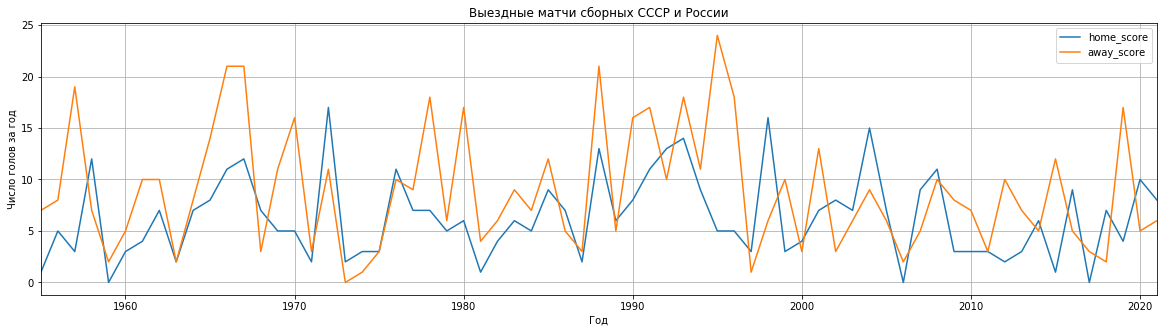

In [17]:
away_games.groupby(['year']).sum()[['home_score', 'away_score']].plot()
plt.title('Выездные матчи сборных СССР и России')
plt.xlabel('Год')
plt.ylabel('Число голов за год')
plt.grid()

Выездные матчи СССР проходили весьма результативно. Не являюсь таким знатаком сборной СССР, поэтому трудно сказать что-то содержательное. Но в 20-м веке уровень футбола был очень низок по сравнению с современным уровнем. В тот период больше играли индивидуальные качества футболистов, а на тактику мало кто обращал внимание. Поэтому лишь единичные сборные показывали результативный футбол. Много качественных футболистов времен СССР, играющие вместе, выдавали высокую рещультативность. Во времена России, с 1995-го года, проявляется резкий спад результативности, что связано: 1 - с резким отставанием российских футбольных школ от европейских, где упор уже ставился не на действующих футболистов, а на молодое поколение. 2 - С новой философией в футболе, где упор делается не на индивидуализм, а на командную игру. Но все равно наблюдается тенденция того, что наша сборная забивает в гостях больше оппонента. Нельзя не отметить селективность соперников. Редко в товарищеских играх можно увидеть громкие вывески. 

## Задание 2

Узнать, в какой день недели наша сборная чаще побеждает, а в какой чаще проигрывает. Также посмотреть, в какой день недели сборная чаще забивает и пропускает

- Найдем процентное соотношение игр в тот или иной день недели

In [18]:
# Для этого вычислим количество игр по дням недели
home_results_with_weekdays = home_games.groupby(['weekday', 'result']).count().reset_index()[['weekday',
                                                                                              "result", 
                                                                                              "home_score"]]
away_results_with_weekdays = away_games.groupby(['weekday', 'result']).count().reset_index()[['weekday',
                                                                                              "result",
                                                                                              "home_score"]]

home_games_list = []
away_games_list = []

for i in range(7):
    home_games_list.append(home_games.groupby('weekday').count().iloc[i,1])

for i in range(7):
    away_games_list.append(away_games.groupby('weekday').count().iloc[i,1])

    
def game_percent(data, list_):
    if data.weekday == '1. Понедельник':
        return round(data.home_score/list_[0]*100, 2)
        
    elif data.weekday == '2. Вторник':
        return round(data.home_score/list_[1]*100, 2)
        
    elif data.weekday == '3. Среда':
        return round(data.home_score/list_[2]*100, 2)
        
    elif data.weekday == '4. Четверг':
        return round(data.home_score/list_[3]*100, 2)
        
    elif data.weekday == '5. Пятница':
        return round(data.home_score/list_[4]*100, 2)
        
    elif data.weekday == '6. Суббота':
        return round(data.home_score/list_[5]*100, 2)
        
    elif data.weekday == '7. Воскресенье':
        return round(data.home_score/list_[6]*100, 2)
        
home_results_with_weekdays.home_score = home_results_with_weekdays.apply(game_percent, list_=home_games_list, axis=1)
away_results_with_weekdays.home_score = away_results_with_weekdays.apply(game_percent, list_=away_games_list, axis=1)
home_results_with_weekdays.head()

,weekday,result,home_score
0,1. Понедельник,ничья,6.67
1,1. Понедельник,победа,73.33
2,1. Понедельник,поражение,20.00
3,2. Вторник,ничья,40.91
4,2. Вторник,победа,45.45


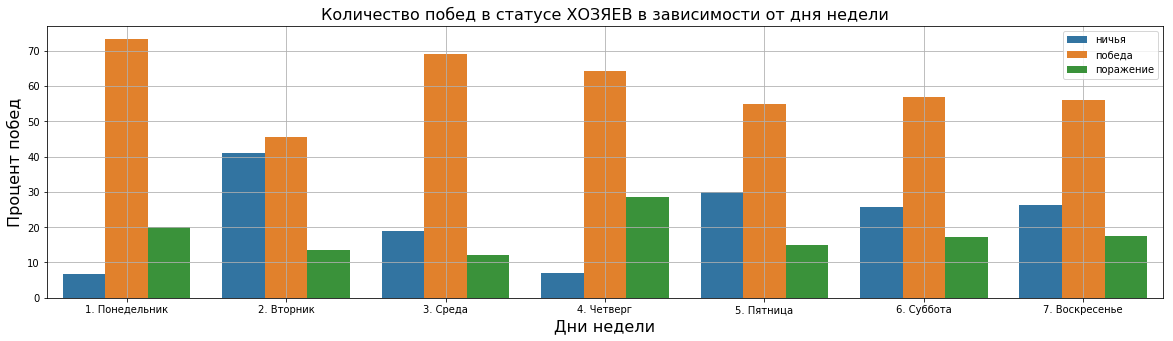

In [19]:
import seaborn as sns

sns.barplot(
    x="weekday", 
    y="home_score", 
    hue="result",
    ci=None,
    data=home_results_with_weekdays
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент побед', fontsize=16)
plt.title('Количество побед в статусе ХОЗЯЕВ в зависимости от дня недели', fontsize=16)
plt.legend()

По данному столбчатому графику видно, что понедельник с точки зрения статистики является самым лучшим днем для достижения победы. Хуже всего на своем поле даются игры во вторник. В плане поражений четверг является худшим днем для проведения игры, а вот в среду самая маленькая вероятность нарваться на поражение. Ничья чаще наблюдается по вторникам, а меньше всего в понедельник и четверг.

- Аналогично построим столбчатую диаграмму для выездных матчей

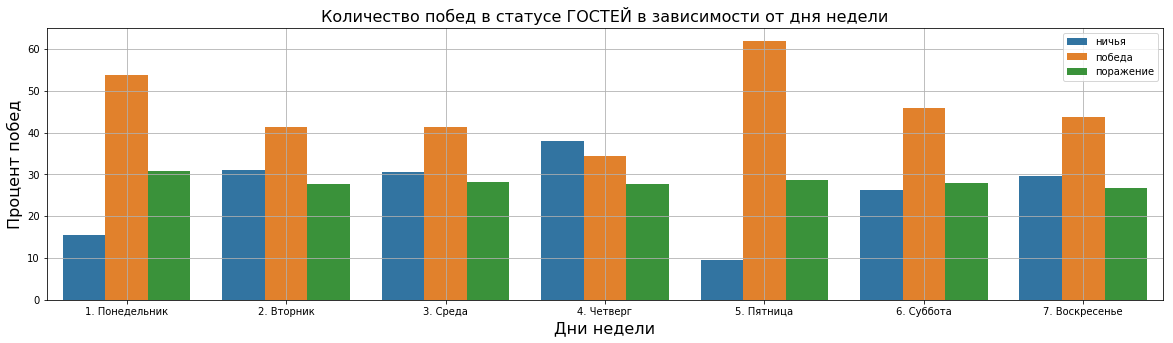

In [20]:
sns.barplot(
    x="weekday", 
    y="home_score", 
    hue="result",
    ci=None,
    data=away_results_with_weekdays
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент побед', fontsize=16)
plt.title('Количество побед в статусе ГОСТЕЙ в зависимости от дня недели', fontsize=16)
plt.legend()

В плане побед выездные матчи с статистической точки зрения выгоднее проводить в пятницу, а вот четверга желательно избегать. Поражения чаще настигали в понедельник, а во все другие дни они распределились примерно равномерно. Ничейный результат реже наблюдался в пятницу, а чаще в четверг.

In [21]:
home_games.head()

,home_score,away_score,year,month,result,weekday
3348,1.0,1.0,1952,NaN,ничья,6. Суббота
3352,2.0,1.0,1952,NaN,победа,2. Вторник
3700,7.0,0.0,1954,NaN,победа,3. Среда
3709,1.0,1.0,1954,NaN,ничья,7. Воскресенье
3825,3.0,2.0,1955,NaN,победа,7. Воскресенье


In [22]:
# Количество забитых и пропущенных голов дома и в гостях за всю историю
home_scored_goals = home_games.home_score.sum()
home_missed_goles = home_games.away_score.sum()
print(f'Забито дома: {home_scored_goals}')
print(f'Пропущено дома: {home_missed_goles}')

away_scored_goals = away_games.away_score.sum()
away_missed_goles = away_games.home_score.sum()
print(f'Забито в гостях: {away_scored_goals}')
print(f'Пропущено в гостях: {away_missed_goles}')

Забито дома: 612.0
Пропущено дома: 238.0
Забито в гостях: 592.0
Пропущено в гостях: 422.0


In [23]:
away_games.head()

,home_score,away_score,year,month,result,weekday
3803,0.0,6.0,1955,NaN,победа,7. Воскресенье
3846,1.0,1.0,1955,NaN,ничья,7. Воскресенье
3991,2.0,5.0,1956,NaN,победа,7. Воскресенье
4025,1.0,2.0,1956,NaN,победа,6. Суббота
4053,2.0,1.0,1956,NaN,поражение,7. Воскресенье


In [24]:
percent_of_home_scored_goles = home_games[['home_score', 'weekday']].groupby('weekday').sum().reset_index()
percent_of_home_scored_goles['percent'] = round(percent_of_home_scored_goles.home_score/home_scored_goals * 100, 2)

percent_of_home_missed_goles = home_games[['away_score', 'weekday']].groupby('weekday').sum().reset_index()
percent_of_home_missed_goles['percent'] = round(percent_of_home_missed_goles.away_score/home_missed_goles * 100, 2)

percent_of_away_scored_goles = away_games[['away_score', 'weekday']].groupby('weekday').sum().reset_index()
percent_of_away_scored_goles['percent'] = round(percent_of_away_scored_goles.away_score/away_scored_goals * 100, 2)

percent_of_away_missed_goles = away_games[['home_score', 'weekday']].groupby('weekday').sum().reset_index()
percent_of_away_missed_goles['percent'] = round(percent_of_away_missed_goles.home_score/away_missed_goles * 100, 2)

In [25]:
percent_of_home_missed_goles

,weekday,away_score,percent
0,1. Понедельник,11.0,4.62
1,2. Вторник,23.0,9.66
2,3. Среда,66.0,27.73
3,4. Четверг,11.0,4.62
4,5. Пятница,16.0,6.72
5,6. Суббота,51.0,21.43
6,7. Воскресенье,60.0,25.21


Text(0.5, 1.0, 'Процент забитых мячей на своем поле по дням недели')

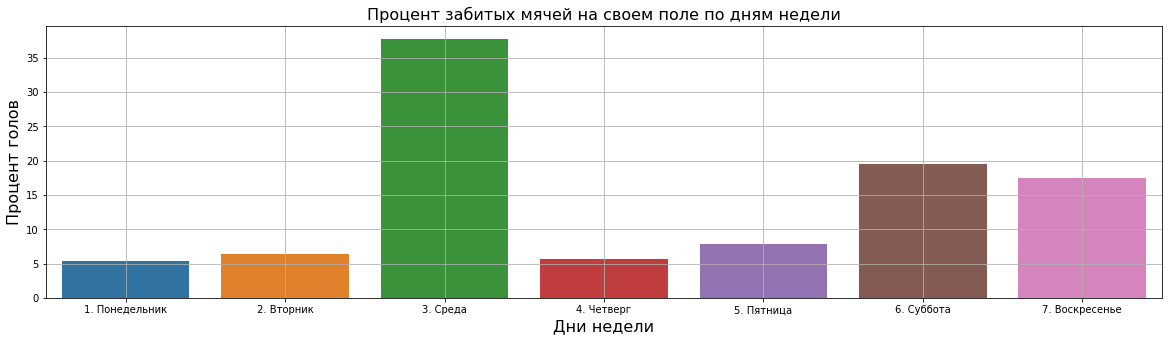

In [26]:
sns.barplot(
    x="weekday", 
    y="percent", 
#     hue="result",
    ci=None,
    data=percent_of_home_scored_goles
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент голов', fontsize=16)
plt.title('Процент забитых мячей на своем поле по дням недели', fontsize=16)


Text(0.5, 1.0, 'Процент пропущенных мячей на своем поле по дням недели')

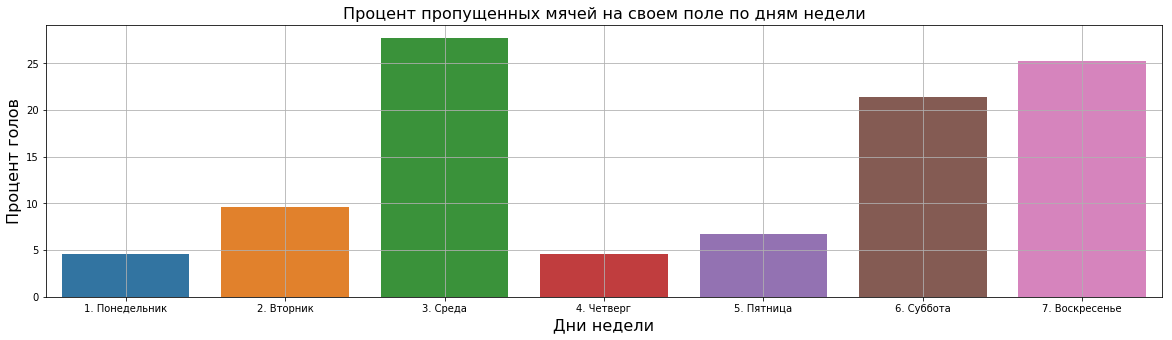

In [27]:
sns.barplot(
    x="weekday", 
    y="percent", 
#     hue="result",
    ci=None,
    data=percent_of_home_missed_goles
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент голов', fontsize=16)
plt.title('Процент пропущенных мячей на своем поле по дням недели', fontsize=16)


Text(0.5, 1.0, 'Процент забитых мячей на чужом поле по дням недели')

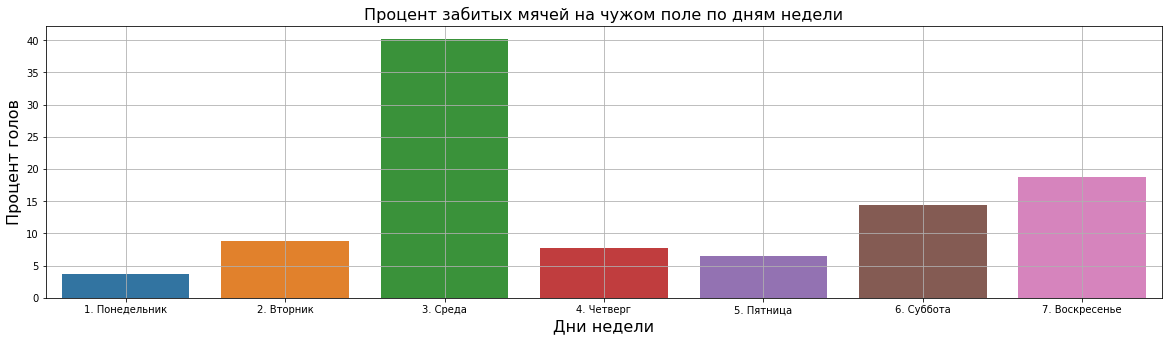

In [28]:
sns.barplot(
    x="weekday", 
    y="percent", 
#     hue="result",
    ci=None,
    data=percent_of_away_scored_goles
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент голов', fontsize=16)
plt.title('Процент забитых мячей на чужом поле по дням недели', fontsize=16)

Text(0.5, 1.0, 'Процент пропущенных мячей на чужом поле по дням недели')

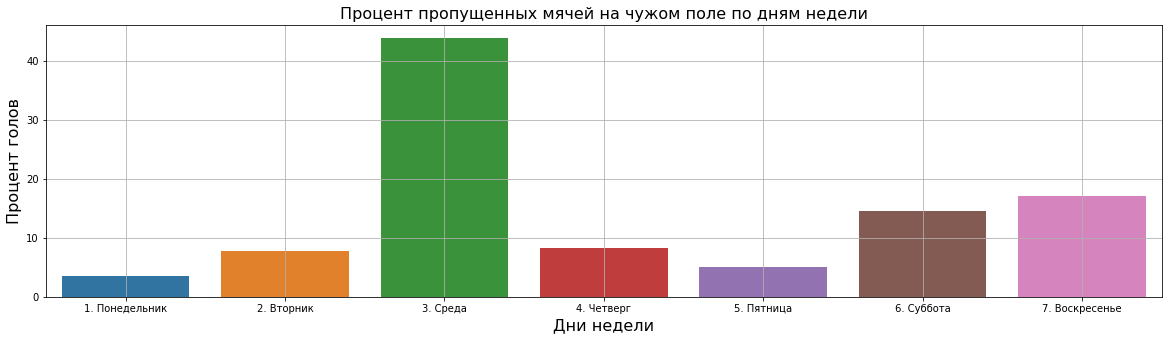

In [30]:
sns.barplot(
    x="weekday", 
    y="percent", 
#     hue="result",
    ci=None,
    data=percent_of_away_missed_goles
    
)
plt.grid()
plt.xlabel('Дни недели', fontsize=16)
plt.ylabel('Процент голов', fontsize=16)
plt.title('Процент пропущенных мячей на чужом поле по дням недели', fontsize=16)

Больше всего забитых и пропущенных мячей как в гостях, так и на своем поле приходится на среду и на выходные. Обычно матчи сборной происходят без отрыва от регулярных чемпионатов. Поэтому после игр в выходные ближайший матч сборных начинается в среду и  в четверг. Так как сборы обычно длятся 10-12 дней, за этот период играются 2-3 матча с интервалом в 2 дня. Вот и получается, что еще один пик забитых мячей наблюдается в выходные дни. Другие дни - это преимущественно крупные турниры, которые длятся месяц, поэтому матчи проходят в любой день недели.

- Аналогичные исследования для забитых на своем поле голов, но в виде круговой диаграммы

Text(0.5, 1.0, 'Процент забитых мячей на своем поле сборной России и СССР в зависимости от дня недели')

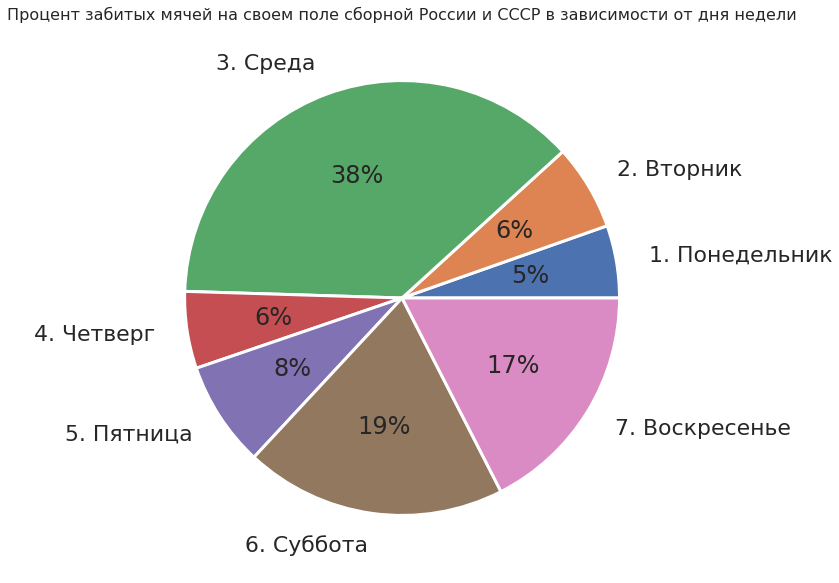

In [86]:
plt.pie(percent_of_home_scored_goles.percent, 
        labels=percent_of_home_scored_goles.weekday, 
        autopct='%1.0f%%', labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.title('Процент забитых мячей на своем поле сборной России и СССР в зависимости от дня недели', fontsize=16)
# sns.set(font_scale=2)

## Задание 3

Посмотреть разброс забитых мячей для сборных России, Испании, Англии, Италии, Германии, Португалии и Франции путем построения "ящика с усами"

In [35]:
home_games.head()

,home_score,away_score,year,month,result,weekday
3348,1.0,1.0,1952,NaN,ничья,6. Суббота
3352,2.0,1.0,1952,NaN,победа,2. Вторник
3700,7.0,0.0,1954,NaN,победа,3. Среда
3709,1.0,1.0,1954,NaN,ничья,7. Воскресенье
3825,3.0,2.0,1955,NaN,победа,7. Воскресенье


In [36]:
# Извлечем все забитые мячи в каждом матче для Испании, Англии, Германии, Италии, Португалии и России
# Испания


def all_goals_of_a_country(country):
    country_home = results.loc[results.home_team ==country, ['home_team', 'home_score']].rename(columns={'home_team':'team',
                                                                                                     'home_score': 'score'})
    country_away = results.loc[results.away_team ==country, ['away_team', 'away_score']].rename(columns={'away_team':'team',
                                                                                                     'away_score': 'score'})
    return pd.concat([country_home, country_away]).reset_index()[['team', 'score']]


spanish = all_goals_of_a_country('Spain')
england = all_goals_of_a_country('England')
russia = all_goals_of_a_country('Russia')
germany = all_goals_of_a_country('Germany')
italy = all_goals_of_a_country('Italy')
portugal = all_goals_of_a_country('Portugal')
france = all_goals_of_a_country('France')

# Все в один Datframe
seven_teams = pd.concat([spanish, england, russia, germany, italy, portugal, france], sort=False)
print(f'Всего эти команды сыграли: {len(seven_teams)} матчей на всех')
seven_teams.head()

Всего эти команды сыграли: 5721 матчей на всех


,team,score
0,Spain,3.0
1,Spain,3.0
2,Spain,3.0
3,Spain,2.0
4,Spain,1.0


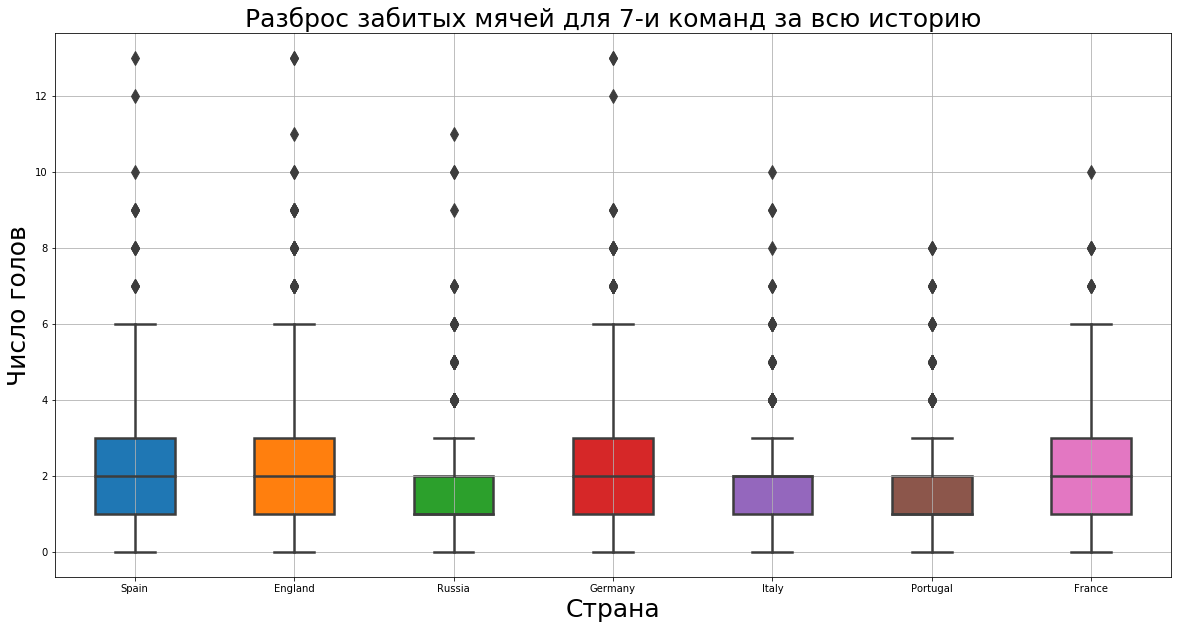

In [42]:
import seaborn as sns

rcParams['figure.figsize'] = 20,10
# sns.set(font_scale=2)
sns.boxplot(x = seven_teams.team, y= seven_teams.score, data=seven_teams, linewidth=2.5, saturation=1,width=0.5, fliersize=10)
plt.xlabel('Страна', fontsize=25)
plt.ylabel('Число голов', fontsize=25)
plt.title('Разброс забитых мячей для 7-и команд за всю историю', fontsize=25)
plt.grid()

In [348]:
# Среднее значение забитых мячей
seven_teams.groupby('team').mean()

,score
team,
England,2.181110
France,1.784131
Germany,2.232678
Italy,1.729829
Portugal,1.695238
Russia,1.716901
Spain,2.016854


На данной иллюстрации представлена степень разброса забитых мячей для 7 сборных. Испания, Англия, Германия и Франция имеют примерно одинаковый разброс, что можно объяснить высоким уровнем данных сборных, а также тем, что в футболе редко когда можно увидеть более 6 голов в исполнении одной команды. Поэтому в 50% матчей число забитых мячей у этих команд варьируется от 1 до 3, а в среднем Германия забивает больше всех - 2.23 мяча за игру. Меньше всех результативность у Португалии - 1.69. Также наблюдаются редкие выбросы - собите, которое очень редко встречается. Возможно, это игры с очень слабым оппонентом или же очень старая дата игры, когда футбол был более индивидуальным. У России, Италии и Португалии визуально не видно медианы, потому что чило забитых мячей составляет целое число, а межквартильный размах равен 1. Медиана в данном случае располагается на верхнем квартиле. 

- Аналогично в виде гистограммы, но только для России

Text(0.5, 1.0, 'Гистограмма забитых мячей в одном матче сборной России и СССР за всю историю')

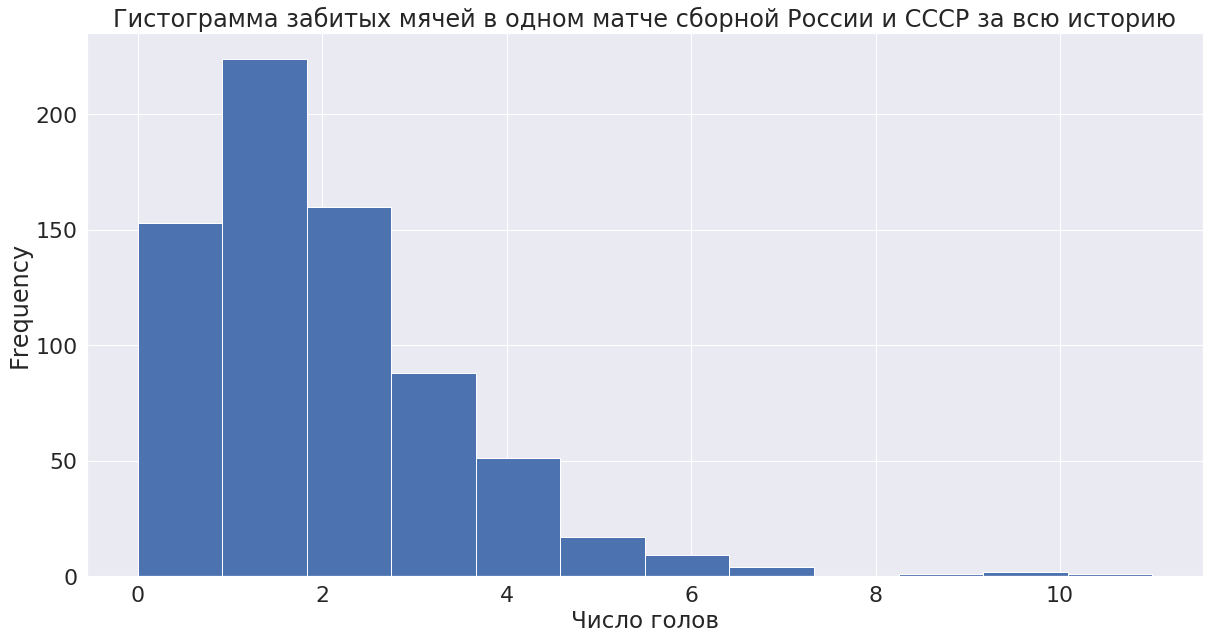

In [85]:
russia.score.plot(kind='hist', x = 'score', bins=12)
plt.xlabel('Число голов', fontsize=23)
plt.title('Гистограмма забитых мячей в одном матче сборной России и СССР за всю историю')